In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Loading data
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the file into a pandas DataFrame
# Replace 'your_file.csv' with the actual filename of the uploaded file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded file: {file_name}")

# Load the file into a DataFrame (assuming it's a CSV file)
mpg = pd.read_excel(file_name)

# Step 3: Display the first few rows of the DataFrame
print("\nData Preview:")
print(mpg.head())

Saving mpg.data.xlsx to mpg.data.xlsx
Uploaded file: mpg.data.xlsx

Data Preview:
    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  Unnamed: 9  Unnamed: 10  \
0          70       1  chevrolet chevelle malibu         NaN          NaN   
1          70       1          buick skylark 320         NaN          NaN   
2          70       1         plymouth satellite         NaN          NaN   
3          70       1              amc rebel sst         NaN          NaN   
4          70       1                ford torino         NaN          NaN   

   Unnamed: 11 Unnamed: 12  
0    

In [2]:
mpg.shape

(406, 13)

In [3]:
mpg.describe ()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000,0.0,0.0,0.0
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966,NaN,NaN,NaN
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000,NaN,NaN,NaN
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,NaN,NaN,NaN
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000,NaN,NaN,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN,NaN,NaN


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB


In [5]:
#Drop unrelated columns containing blank values
mpg.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [6]:
mpg.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
#Check for duplicated values
mpg.duplicated().sum()

0

In [8]:
#Check for null values
pd.isnull(mpg).sum()


,0
mpg,8
cylinders,0
displayments,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [9]:
# We decided to drop null values for the column 'mpg' since it was our target column and we replaced nulls in the 'horsepower' column with median.
mpg = mpg.dropna(subset=["mpg"])
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].median())
print(mpg)


      mpg  cylinders  displayments  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

<ipython-input-9-8e651ce1db6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].median())


In [10]:
pd.isnull(mpg).sum()

,0
mpg,0
cylinders,0
displayments,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [14]:
# Correctly rename column "displayments"

mpg = mpg.rename(columns={'displayments': 'displacement'})

In [15]:
#Changed data type for displacement and horsepower

columns_for_change = ['displacement', 'horsepower']
mpg[columns_for_change] = mpg[columns_for_change].astype(int)


In [16]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 31.1+ KB


In [18]:
#Splitting the Car Name Column in order to create two new columns for brand and car name
mpg[['brand', 'model']] = mpg['car name'].str.split(' ', n=1, expand=True)
mpg['model'] = mpg['model'].str.replace(' ', ' ', regex=False)


In [19]:
counts_of_brand=mpg['brand'].value_counts()
counts_of_brand

,count
brand,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


In [20]:
# We continued with correcting some of the brand names as they were mispelled
brand_corrections = {
    "vw": "volkswagen",
    "maxda": "mazda",
    "chevroelt": "chevrolet",
    "chevy": "chevrolet",
    "toyouta": "toyota",
    "mercedes": "mercedes-benz","vokswagen": "volkswagen","capri":"ford","mercury":"ford","triumph":"bmw","plymouth":"chrysler"}
mpg["brand"] = mpg["brand"].replace(brand_corrections)


In [21]:
counts_of_brand=mpg['brand'].value_counts()
counts_of_brand

,count
brand,
ford,63
chevrolet,47
chrysler,37
amc,28
dodge,28
toyota,26
datsun,23
volkswagen,22
buick,17


In [22]:
# Determine the top brands (top 5 by count)
top_brands = mpg["brand"].value_counts().nlargest(5).index

# One-hot encode the top five brands and combine the remaining as others
mpg_encoded = pd.get_dummies(mpg["brand"].where(mpg["brand"].isin(top_brands), "other"))

print(mpg_encoded)



       amc  chevrolet  chrysler  dodge   ford  other
0    False       True     False  False  False  False
1    False      False     False  False  False   True
2    False      False      True  False  False  False
3     True      False     False  False  False  False
4    False      False     False  False   True  False
..     ...        ...       ...    ...    ...    ...
401  False      False     False  False   True  False
402  False      False     False  False  False   True
403  False      False     False   True  False  False
404  False      False     False  False   True  False
405  False       True     False  False  False  False

[398 rows x 6 columns]


In [23]:
#Removing the car name and model column
mpg.drop('car name',axis=1)
mpg.drop('model',axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,chrysler
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,ford
402,44.0,4,97,52,2130,24.6,82,2,vw pickup,volkswagen
403,32.0,4,135,84,2295,11.6,82,1,dodge rampage,dodge
404,28.0,4,120,79,2625,18.6,82,1,ford ranger,ford


In [39]:
# Handling outliers
#Firstly calculating the metrics for the numerical variables in our dataset
mpg[['mpg', 'acceleration', 'displacement', 'horsepower', 'weight']].describe()


,mpg,acceleration,displacement,horsepower,weight
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,15.568090,193.424623,104.296482,2970.424623
std,7.815984,2.757689,104.271000,38.224809,846.841774
min,9.000000,8.000000,68.000000,46.000000,1613.000000
25%,17.500000,13.825000,104.250000,76.000000,2223.750000
50%,23.000000,15.500000,148.500000,93.000000,2803.500000
75%,29.000000,17.175000,262.000000,125.000000,3608.000000
max,46.600000,24.800000,455.000000,230.000000,5140.000000


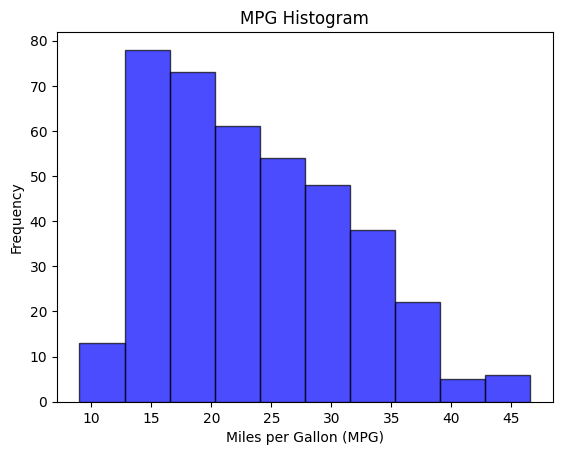

In [40]:
# Create a histogram for'mpg'
mpg['mpg'].plot.hist(bins=10, alpha=0.7, color='blue', edgecolor='black', title='MPG Histogram')
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Frequency")
plt.show()

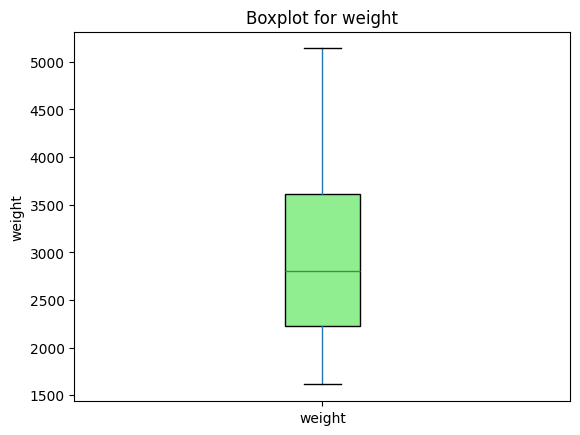

In [41]:
# Create a boxplot for 'weight'
mpg.boxplot(column='weight', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for weight")
plt.ylabel("weight")
plt.show()

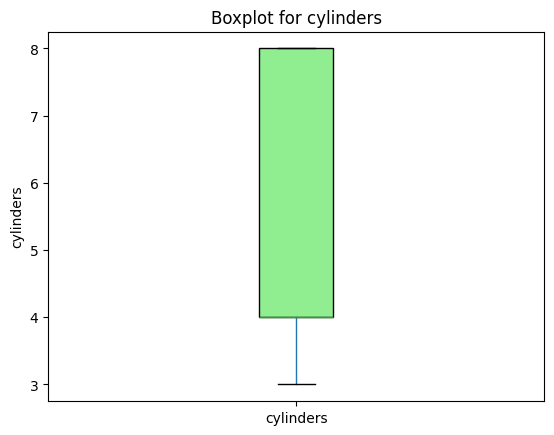

In [42]:
# Create a boxplot for 'cylinders'
mpg.boxplot(column='cylinders', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for cylinders")
plt.ylabel("cylinders")
plt.show()


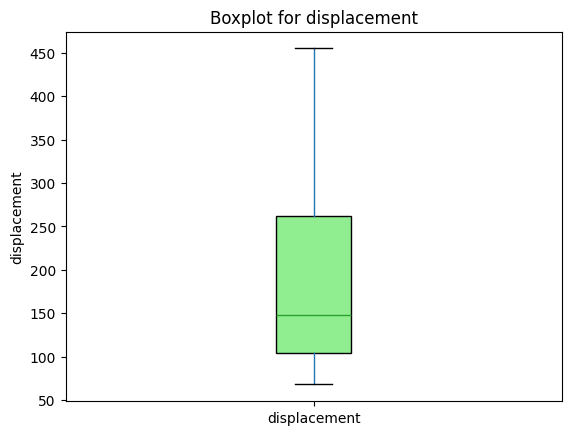

In [44]:
# Create a boxplot for 'displacement'
mpg.boxplot(column='displacement', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for displacement")
plt.ylabel("displacement")
plt.show()

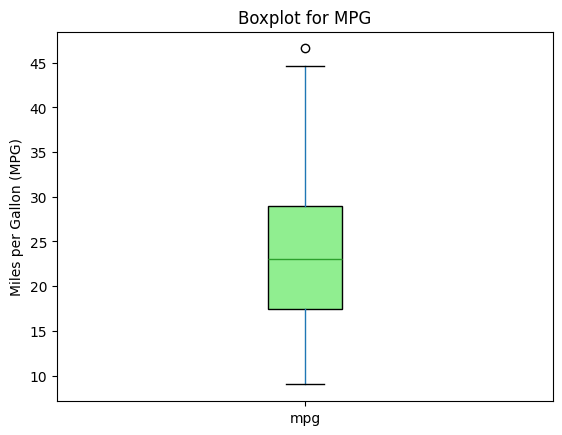

In [45]:
# Create a boxplot for 'mpg'
mpg.boxplot(column='mpg', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for MPG")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()

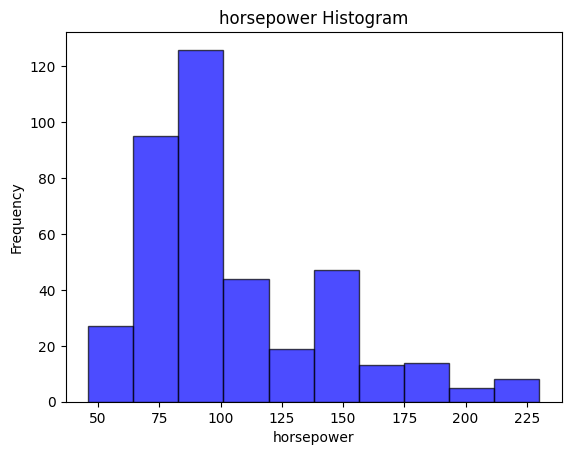

In [46]:
# Create a histogram for 'horsepower'
mpg['horsepower'].plot.hist(bins=10, alpha=0.7, color='blue', edgecolor='black', title='horsepower Histogram')
plt.xlabel("horsepower")
plt.ylabel("Frequency")
plt.show()

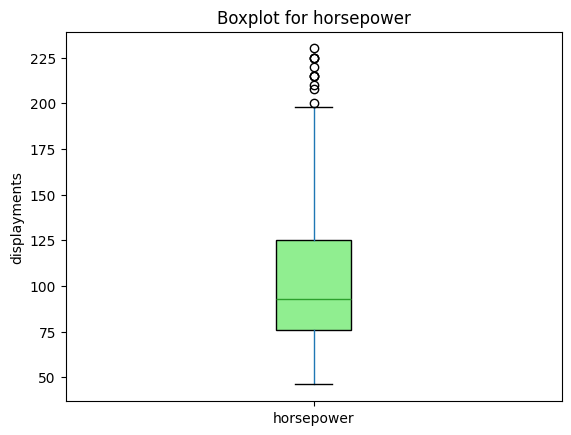

In [47]:
# Create a boxplot for 'horsepower'
mpg.boxplot(column='horsepower', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for horsepower")
plt.ylabel("displayments")
plt.show()

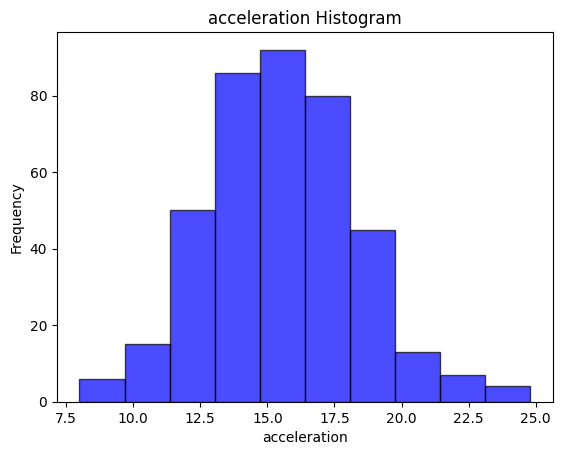

In [48]:
# Create a histogram for 'acceleration'
mpg['acceleration'].plot.hist(bins=10, alpha=0.7, color='blue', edgecolor='black', title='acceleration Histogram')
plt.xlabel("acceleration")
plt.ylabel("Frequency")
plt.show()

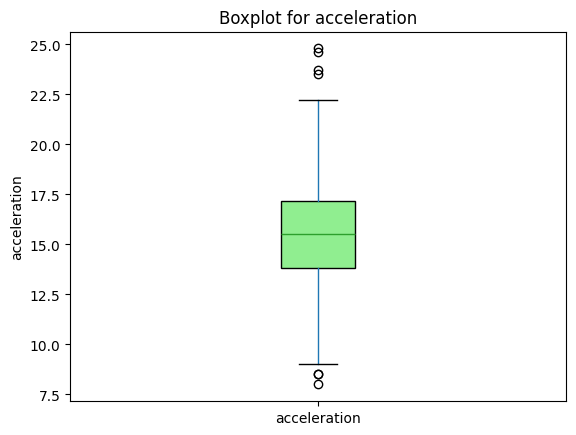

In [49]:
# Create a boxplot for 'acceleration'
mpg.boxplot(column='acceleration', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot for acceleration")
plt.ylabel("acceleration")
plt.show()


In [50]:
# We Used the IQR Method in order to find the outliers for columns ('mpg', 'cylinders', 'displacement', 'horsepower', 'weight')
def find_outliers_IQR_multiple(df, columns):
    outlier_dict = {}
    for column in columns:

        # Calculate Q1  and Q3 for each column
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = q3 - q1

        # Identify outliers in the column
        outliers = mpg[(mpg[column] < (q1 - 1.5 * IQR)) | (mpg[column] > (q3 + 1.5 * IQR))]

        # Store outliers for the column in the dictionary
        outlier_dict[column] = outliers
    return outlier_dict


# Specify the columns to check for outliers
columns_for_outliers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']

# Call the function for multiple columns
outliers_dict = find_outliers_IQR_multiple(mpg, columns_for_outliers)

# Output the results
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print("Number of outliers:", len(outliers))
    print("Max outlier value:", outliers[column].max())
    print("Min outlier value:", outliers[column].min())
    print("-" * 50)

Outliers in 'mpg':
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
329  46.6          4            86          65    2110          17.9   

     model year  origin   car name  brand model  
329          80       3  mazda glc  mazda   glc  
Number of outliers: 1
Max outlier value: 46.6
Min outlier value: 46.6
--------------------------------------------------
Outliers in 'cylinders':
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name, brand, model]
Index: []
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan
--------------------------------------------------
Outliers in 'displacement':
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name, brand, model]
Index: []
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan
--------------------------------------------------
Outliers in 'horsepower':
      mpg 

In [52]:
import numpy as np
from scipy.stats import zscore


In [53]:
column_name = "acceleration" # Follows Normal Distribution , so we have procedeed with z-score

# Calculate z-scores for the column
mpg['z_score'] = zscore(mpg['acceleration'])
threshold = 3
mpg['outlier_zscore'] = np.abs(mpg['z_score']) > threshold

print("Outliers detected using Z-Score Method:")
print(mpg[mpg['outlier_zscore']])


Outliers detected using Z-Score Method:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
306  27.2          4           141          71    3190          24.8   
402  44.0          4            97          52    2130          24.6   

     model year  origin     car name       brand   model   z_score  \
306          79       2  peugeot 504     peugeot     504  3.351912   
402          82       2    vw pickup  volkswagen  pickup  3.279296   

     outlier_zscore  
306            True  
402            True  


In [ ]:
# Feature Selection for mpg

# Separate features and target
X = mpg.drop('mpg', axis=1)
y = mpg['mpg']

# Calculate correlation
correlation = mpg.corr()

print(correlation['mpg'].sort_values(ascending=False))

In [ ]:
# In order to perform classification algorithms we created a new column called efficiency which replaces numbers in three categories.
# The three categories are: low (3), medium (2), high (1) for fuel efficiency

# Calculate min, max, and range
min_mpg = mpg['mpg'].min()
max_mpg = mpg['mpg'].max()
range_mpg = max_mpg - min_mpg

# Calculate thresholds
thresholds = [min_mpg + range_mpg * i / 3 for i in (1, 2)]

# Define bins and labels
bins = [float('-inf')] + thresholds + [float('inf')]
labels = [3, 2, 1]  # Low (3), Medium (2), High (1)

# Apply classification
mpg['efficiency'] = pd.cut(mpg['mpg'], bins=bins, labels=labels, include_lowest=True)

mpg.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3


In [ ]:
# Remove "mpg" column

mpg.drop('mpg', axis=1, inplace=True)

mpg.head()